In [1]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from datetime import datetime 

In [3]:
train_df = pd.read_csv("../train.csv")

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [62]:
df_clean = train_df.dropna(subset=['sales'])
features = df_clean.columns.difference(['date'])

In [73]:
X = df_clean[features]
y = df_clean['sales'].values


In [74]:
X

,family,id,onpromotion,sales,store_nbr
0,AUTOMOTIVE,0,0,0.000,1
1,BABY CARE,1,0,0.000,1
2,BEAUTY,2,0,0.000,1
3,BEVERAGES,3,0,0.000,1
4,BOOKS,4,0,0.000,1
...,...,...,...,...,...
3000883,POULTRY,3000883,0,438.133,9
3000884,PREPARED FOODS,3000884,1,154.553,9
3000885,PRODUCE,3000885,148,2419.729,9
3000886,SCHOOL AND OFFICE SUPPLIES,3000886,8,121.000,9


<Axes: xlabel='Date', ylabel='Sales'>

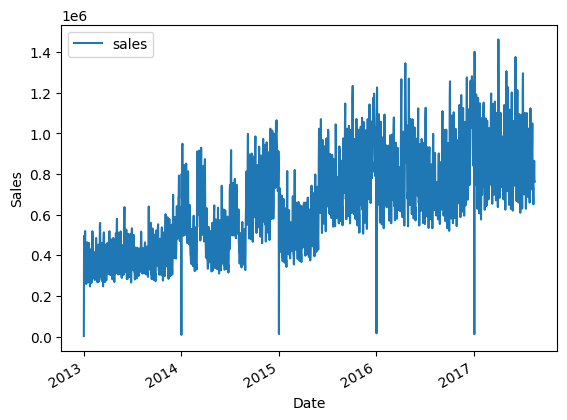

In [11]:
data_grouped = train_df[['date', 'sales']].groupby('date').sum()
data_grouped.index = pd.to_datetime(data_grouped.index, format='%Y-%m-%d')
data_grouped.plot(xlabel="Date", ylabel="Sales")

In [31]:
df = data_grouped.copy()

In [35]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

In [37]:
df['sales_a_week_ago'] = df['sales'].shift(7)
df['sales_a_month_ago'] = df['sales'].shift(28)


In [39]:
df['last_week_mean'] = df['sales'].rolling(7).mean()
df['last_week_median'] = df['sales'].rolling(7).median()
df['last_week_std'] = df['sales'].rolling(7).std()

In [56]:
df

,sales,year,month,day,day_of_week,is_weekend,sales_a_week_ago,sales_a_month_ago,last_week_mean,last_week_median,last_week_std
date,,,,,,,,,,,
2013-01-01,2511.618999,2013,1,1,1,0,NaN,NaN,NaN,NaN,NaN
2013-01-02,496092.417944,2013,1,2,2,0,NaN,NaN,NaN,NaN,NaN
2013-01-03,361461.231124,2013,1,3,3,0,NaN,NaN,NaN,NaN,NaN
2013-01-04,354459.677093,2013,1,4,4,0,NaN,NaN,NaN,NaN,NaN
2013-01-05,477350.121229,2013,1,5,5,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,826373.722022,2017,8,11,4,0,8.277757e+05,7.654896e+05,820340.633670,797464.963817,141848.380367
2017-08-12,792630.535079,2017,8,12,5,1,9.656937e+05,9.690771e+05,795617.331469,792630.535079,126548.697108
2017-08-13,865639.677471,2017,8,13,6,1,1.049559e+06,1.100804e+06,769343.119068,792630.535079,72654.170868
